In [1]:
import pandas as pd
import matplotlib.dates as mdates

# Loading the final time shifted data set (to ensure no future data is used for prediction)

In [2]:
# read data
data = pd.read_csv(r"../Data/Aggregated_Final_Lin_Rakeen_Fixed_returns.csv")

In [3]:
# copy without warnings
pd.options.mode.chained_assignment = None

> Quick EDA visualization


Additionally, as a prudent risk management strategy, a sell signal is triggered if Bitcoin prices decline for nine consecutive days.

In [4]:
# # make sweetviz report
# import sweetviz as sv

# report = sv.analyze(data)

# # save report
# report.show_html("../EDA/fixed_return_report.html")

In [5]:
# drop magnitude and Direction columns
data = data.drop(columns=["magnitude", "Direction"])
data.head(15)

,date_dt,positive_count_bitcoin,negative_count_bitcoin,neutral_count_bitcoin,positive_avg_score_bitcoin,negative_avg_score_bitcoin,neutral_avg_score_bitcoin,total_news_count_bitcoin,total_news_score_bitcoin,signal_bitcoin,...,T5YIE_lag1,T5YIE_lag2,S&P500_Close_lag1,S&P500_Close_lag2,VIX_Close_lag1,VIX_Close_lag2,S&P_Return_lag1,S&P_Return_lag2,gg_trend,Daily Return
0,2021-04-22,1.0,1.0,5.0,0.642198,0.476258,0.731610,7.0,0.165941,0.000000,...,2.52,2.56,4134.939941,4163.259766,18.680000,17.290001,-0.006802,-0.005307,0.137663,-0.040582
1,2021-04-23,1.0,1.0,5.0,0.642198,0.476258,0.731610,7.0,0.165941,0.000000,...,2.53,2.52,4173.419922,4134.939941,17.500000,18.680000,0.009306,-0.006802,0.137663,-0.013001
2,2021-04-24,1.0,11.0,3.0,0.586267,0.906848,0.899653,15.0,-9.389061,-0.833333,...,2.42,2.53,4134.979980,4173.419922,18.709999,17.500000,-0.009211,0.009306,0.137663,-0.020620
3,2021-04-25,1.0,11.0,3.0,0.586267,0.906848,0.899653,15.0,-9.389061,-0.833333,...,2.44,2.42,4180.169922,4134.979980,17.330000,18.709999,0.010929,-0.009211,0.018928,-0.021133
4,2021-04-26,1.0,11.0,3.0,0.586267,0.906848,0.899653,15.0,-9.389061,-0.833333,...,2.44,2.44,4180.169922,4180.169922,17.330000,17.330000,0.000000,0.010929,0.018928,0.097480
5,2021-04-27,4.0,0.0,4.0,0.667552,0.000000,0.856313,8.0,2.670206,1.000000,...,2.44,2.44,4180.169922,4180.169922,17.330000,17.330000,0.000000,0.000000,0.018928,0.018548
6,2021-04-28,4.0,0.0,4.0,0.667552,0.000000,0.856313,8.0,2.670206,1.000000,...,2.47,2.44,4187.620117,4180.169922,17.639999,17.330000,0.001782,0.000000,0.018928,-0.003794
7,2021-04-29,4.0,0.0,4.0,0.667552,0.000000,0.856313,8.0,2.670206,1.000000,...,2.51,2.47,4186.720215,4187.620117,17.559999,17.639999,-0.000215,0.001782,0.018928,-0.023430
8,2021-04-30,3.0,1.0,4.0,0.758420,0.778473,0.956340,8.0,1.496786,0.500000,...,2.54,2.51,4183.180176,4186.720215,17.280001,17.559999,-0.000846,-0.000215,0.018928,0.075415
9,2021-05-01,3.0,1.0,4.0,0.758420,0.778473,0.956340,8.0,1.496786,0.500000,...,2.56,2.54,4211.470215,4183.180176,17.610001,17.280001,0.006763,-0.000846,0.018928,0.001348


**Linear Regression Implementation**

In [6]:
# linear regression model
from sklearn.linear_model import LinearRegression


data.set_index("date_dt", inplace=True)
data.index = pd.to_datetime(data.index)

# convert return to moving average
data["Daily_Return_rolling_15_avg"] = data["Daily Return"].rolling(window=15).mean()
data.dropna(inplace=True)
data.head(20)

,positive_count_bitcoin,negative_count_bitcoin,neutral_count_bitcoin,positive_avg_score_bitcoin,negative_avg_score_bitcoin,neutral_avg_score_bitcoin,total_news_count_bitcoin,total_news_score_bitcoin,signal_bitcoin,TWITTER_SENTIMENT_DAILY_AVG,...,T5YIE_lag2,S&P500_Close_lag1,S&P500_Close_lag2,VIX_Close_lag1,VIX_Close_lag2,S&P_Return_lag1,S&P_Return_lag2,gg_trend,Daily Return,Daily_Return_rolling_15_avg
date_dt,,,,,,,,,,,,,,,,,,,,,
2021-05-06,0.0,1.0,2.0,0.000000,0.827074,0.900657,3.0,-0.827074,-1.000000,-0.0058,...,2.60,4164.660156,4192.660156,19.480000,18.309999,-0.006678,0.002748,0.122346,-0.018055,0.003011
2021-05-07,0.0,1.0,2.0,0.000000,0.827074,0.900657,3.0,-0.827074,-1.000000,-0.0075,...,2.62,4167.589844,4164.660156,19.150000,19.480000,0.000703,-0.006678,0.122346,0.016877,0.006842
2021-05-08,0.0,1.0,2.0,0.000000,0.827074,0.900657,3.0,-0.827074,-1.000000,-0.0228,...,2.68,4201.620117,4167.589844,18.389999,19.150000,0.008165,0.000703,0.122346,0.024922,0.009370
2021-05-09,0.0,1.0,2.0,0.000000,0.827074,0.900657,3.0,-0.827074,-1.000000,-0.0228,...,2.66,4232.600098,4201.620117,16.690001,18.389999,0.007373,0.008165,0.105151,-0.009766,0.010093
2021-05-10,2.0,1.0,0.0,0.869209,0.913061,0.000000,3.0,0.825356,0.333333,-0.0228,...,2.65,4232.600098,4232.600098,16.690001,16.690001,0.000000,0.007373,0.105151,-0.041596,0.008729
2021-05-11,2.0,1.0,0.0,0.869209,0.913061,0.000000,3.0,0.825356,0.333333,0.0048,...,2.65,4232.600098,4232.600098,16.690001,16.690001,0.000000,0.000000,0.105151,0.015010,0.003231
2021-05-12,2.0,0.0,0.0,0.949838,0.000000,0.000000,2.0,1.899676,1.000000,0.0153,...,2.65,4188.430176,4232.600098,19.660000,16.690001,-0.010436,0.000000,0.105151,-0.142967,-0.007536
2021-05-13,2.0,0.0,0.0,0.949838,0.000000,0.000000,2.0,1.899676,1.000000,0.0130,...,2.71,4152.100098,4188.430176,21.840000,19.660000,-0.008674,-0.010436,0.105151,0.011443,-0.006521
2021-05-14,1.0,8.0,2.0,0.906305,0.798987,0.774572,11.0,-5.485593,-0.777778,-0.0168,...,2.68,4063.040039,4152.100098,27.590000,21.840000,-0.021449,-0.008674,0.105151,0.003300,-0.004739


In [7]:
from sklearn.metrics import mean_squared_error
import joblib

data = data.dropna()

# Featues chosen based on pearson correlation
cols = [
    "stoch_%K",
    "stoch_%D",
    "S&P500 Return",
    "rsi",
    "negative_count_bitcoin",
    "positive_count_bitcoin",
    "total_news_score_bitcoin",
    "negative_avg_score_bitcoin",
    "positive_avg_score_bitcoin",
    "signal_bitcoin",
    "gg_trend",
    "Daily_Return_rolling_15_avg",
]
X = data[cols].drop(columns=["Daily_Return_rolling_15_avg"])
# cumulative sum for last 100 days of news sentiment
X["total_news_score_lag_100_sum_bit"] = (
    data["total_news_score_bitcoin"].rolling(100).sum()
)
X["total_news_score_lag_100_sum_coin"] = (
    data["total_news_score_coinbase"].rolling(100).sum()
)
y = data["Daily_Return_rolling_15_avg"]

# drop null values
X = X.dropna()
y = y[y.index.isin(X.index)]

split_date = "2023-03-01"
X_train = X[X.index < split_date]
X_test = X[X.index >= split_date]
y_train = y[y.index < split_date]
y_test = y[y.index >= split_date]

# fit model
model = LinearRegression()
model.fit(X_train, y_train)

# make predictions
y_pred = model.predict(X_test)

# evaluate model
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

r_squared = model.score(X_test, y_test)
print(f"R Squared: {r_squared}")

# print adjusted r squared
n = X_test.shape[0]
p = X_test.shape[1]
adj_r_squared = 1 - (1 - r_squared) * (n - 1) / (n - p - 1)
print(f"Adjusted R Squared: {adj_r_squared}")

# save model
joblib.dump(model, "../Modeling/models/LR_model_ideal.pkl")

Mean Squared Error: 1.8128805438112913e-05
R Squared: 0.5703388500450777
Adjusted R Squared: 0.5552833380520481


['../Modeling/models/LR_model_ideal.pkl']

**Calculating Results**

In [8]:
# make a dataframe with y_test and y_pred
results = pd.DataFrame({"y_test": y_test, "y_pred": y_pred})

# compute residuals
results["residuals"] = results["y_test"] - results["y_pred"]

# save results
# results.to_csv("../Modeling/models/LR_results_ideal.csv")

daily_test_returns = data[data.index >= split_date]["Daily Return"]
daily_close = data[data.index >= split_date]["Close"].shift(-1)
daily_open = data[data.index >= split_date]["Open"].shift(-1)

**PLotting Results**

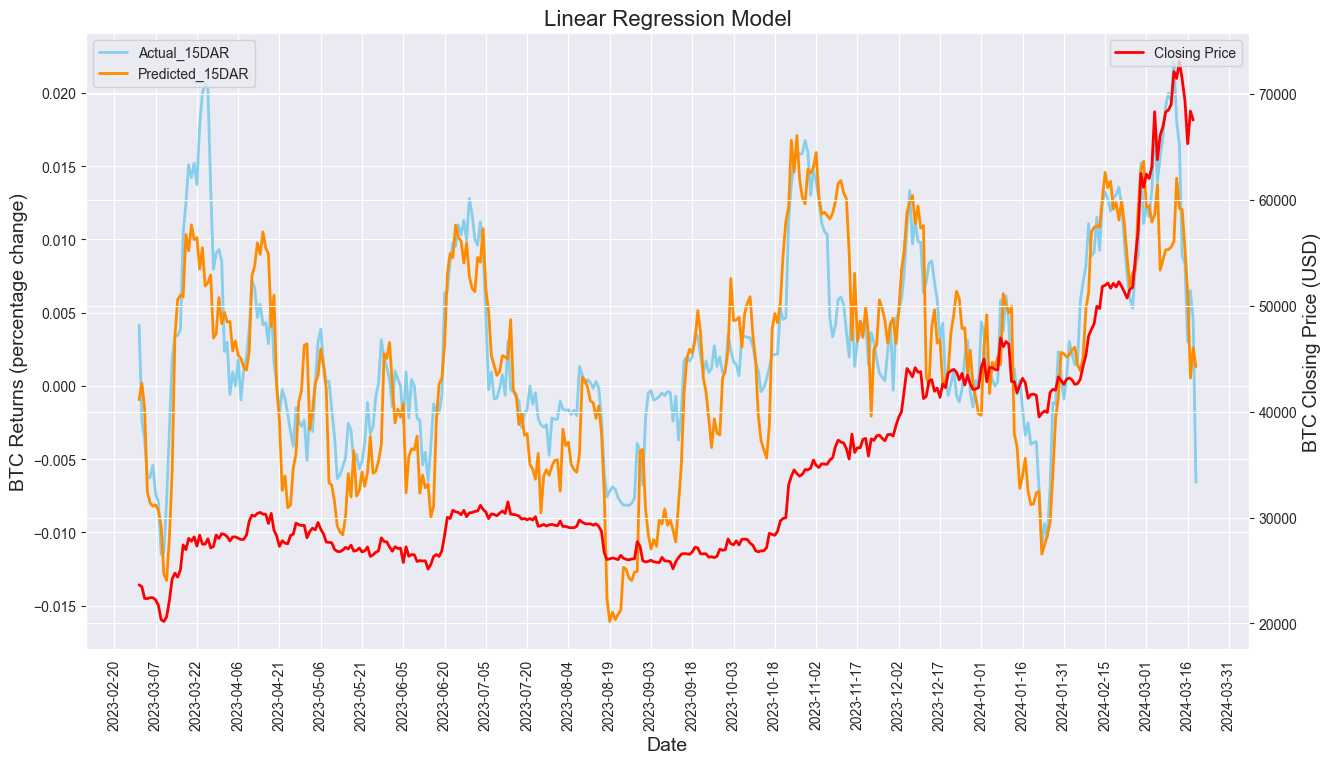

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the style of seaborn
sns.set_style("darkgrid")

# Create a figure and a set of subplots
fig, ax1 = plt.subplots(figsize=(15, 8))

# Plot the y_test and y_pred
ax1.plot(results["y_test"], label="Actual_15DAR", linewidth=2, color="skyblue")
ax1.plot(results["y_pred"], label="Predicted_15DAR", linewidth=2, color="darkorange")

# Set the title and labels
ax1.set_title("Linear Regression Model", fontsize=16)
ax1.set_ylabel("BTC Returns (percentage change)", fontsize=14)
ax1.set_xlabel("Date", fontsize=14)

days_fmt = mdates.DateFormatter("%Y-%m-%d")
ax1.xaxis.set_major_formatter(days_fmt)
# Set x-axis major ticks to occur every 5 days.
ax1.xaxis.set_major_locator(mdates.DayLocator(interval=15))

# Rotate the x-axis labels
plt.xticks(rotation=90)

# Add a legend
ax1.legend(loc="upper left")

# plot the close price on the same graph on the right axis
ax2 = ax1.twinx()
ax2.plot(daily_close, color="red", label="Closing Price", linewidth=2)
ax2.set_ylabel("BTC Closing Price (USD)", fontsize=14)
ax2.legend(loc="upper right")

plt.show()

> According to the following results, the baseline model beats the random model.

In [10]:
# # see if direction was right
# results["direction"] = daily_test_returns * results["y_pred"]
# results["direction"] = results["direction"].apply(lambda x: 1 if x > 0 else 0)

# # print accuracy
# accuracy = results["direction"].sum() / results["direction"].count()
# print(f"Linear Regression Daily Direction Accuracy: {accuracy}")

# results["actual_direction"] = daily_test_returns.apply(lambda x: 1 if x > 0 else 0)

# # print confusion matrix
# from sklearn.metrics import confusion_matrix

# confusion_matrix = confusion_matrix(results["direction"], results["actual_direction"])
# print(confusion_matrix)

# # write out true positive, false positive, true negative, false negative
# tp = confusion_matrix[0][0]
# fp = confusion_matrix[0][1]
# fn = confusion_matrix[1][0]
# tn = confusion_matrix[1][1]

# print(f"True Positives: {tp}")
# print(f"False Positives: {fp}")
# print(f"False Negatives: {fn}")
# print(f"True Negatives: {tn}")

# # calculate precision
# precision = tp / (tp + fp)
# print(f"Precision: {precision}")

# # calculate recall
# recall = tp / (tp + fn)
# print(f"Recall: {recall}")

# # calculate f1 score
# f1 = 2 * (precision * recall) / (precision + recall)
# print(f"F1 Score: {f1}")

# # make a column that picks direction randomly
# import random

# accuracies = []

# for _ in range(90000):
#     results["random_direction"] = results["y_pred"].apply(
#         lambda x: random.choice([-1, 1])
#     )
#     results["random_direction"] = results["random_direction"] * daily_test_returns
#     results["random_direction"] = results["random_direction"].apply(
#         lambda x: 1 if x > 0 else 0
#     )

#     # calculate accuracy
#     accuracy = results["random_direction"].sum() / results["random_direction"].count()
#     accuracies.append(accuracy)

# # print mean accuracy
# print(f"Mean Random Daily Direction Accuracy: {sum(accuracies) / len(accuracies)}")

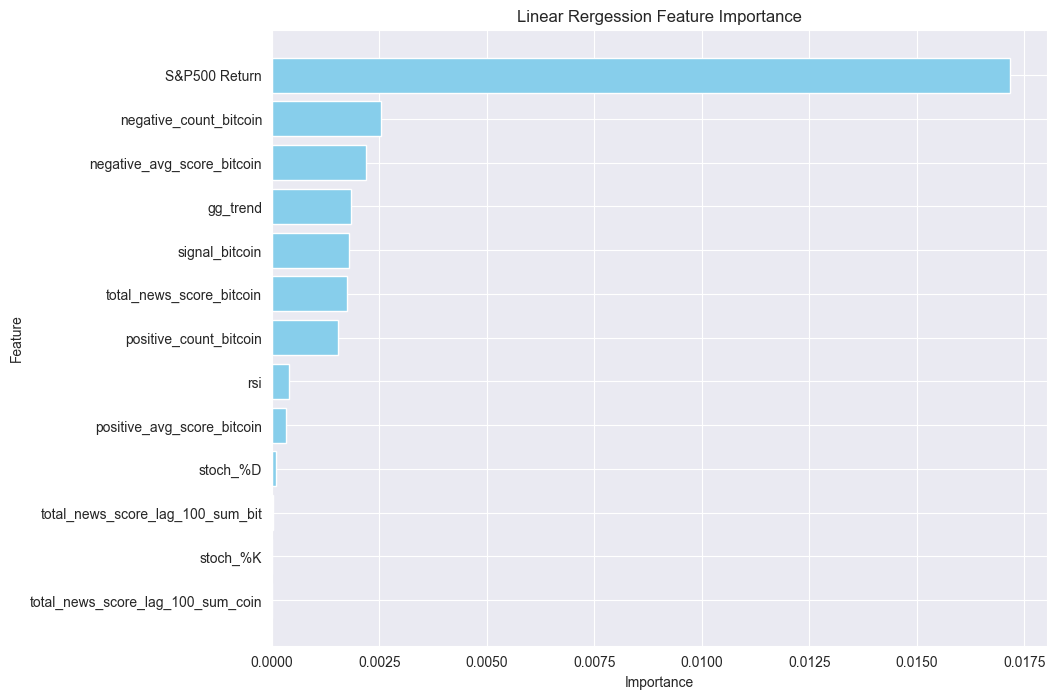

In [11]:
# Feature importance
importance = model.coef_
feature_importance = pd.DataFrame(
    {"Feature": X_train.columns, "Importance": importance}
)

# Sort by absolute value of importance
feature_importance["Importance"] = feature_importance["Importance"].abs()
feature_importance = feature_importance.sort_values(by="Importance", ascending=False)

# Plot
plt.figure(figsize=(10, 8))
plt.barh(
    feature_importance["Feature"], feature_importance["Importance"], color="skyblue"
)
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.title("Linear Rergession Feature Importance")
plt.gca().invert_yaxis()  # Invert y axis to have the most important feature at top
plt.show()

**Random Forest Implementatin**

In [12]:
from sklearn.ensemble import RandomForestRegressor
import numpy as np


def train_evaluate_and_plot(X_train, y_train, X_test, y_test, daily_close, plot_title):
    """Train, evaluate and plot a random forest model."""
    model = RandomForestRegressor()
    # fit model
    model.fit(X_train, y_train)

    # make predictions
    y_pred = model.predict(X_test)

    # evaluate model
    mse = mean_squared_error(y_test, y_pred)
    print(f"Mean Squared Error: {mse}")

    r_squared = model.score(X_test, y_test)
    print(f"R Squared: {r_squared}")

    # make a dataframe with y_test and y_pred
    results = pd.DataFrame({"y_test": y_test, "y_pred": y_pred})

    # compute residuals
    results["residuals"] = results["y_test"] - results["y_pred"]

    # Set the style of seaborn
    sns.set_style("darkgrid")

    # plot results
    plt.figure(figsize=(15, 8))
    plt.plot(results["y_test"], label="Actual_15DAR", linewidth=2)
    plt.plot(results["y_pred"], label="Predicted_15DAR", linewidth=2)
    plt.legend(loc="upper center")
    plt.title(plot_title, fontsize=16)
    plt.xticks(rotation=90)
    days_fmt = mdates.DateFormatter("%Y-%m-%d")
    plt.gca().xaxis.set_major_formatter(days_fmt)
    # Set x-axis major ticks to occur every 15 days.
    plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=15))
    plt.ylabel("BTC Returns (percentage change)", fontsize=14)

    # plot the close price on the same graph on the right axis
    ax2 = plt.twinx()
    ax2.plot(daily_close, color="red", label="Close", linewidth=2)
    ax2.legend(loc="upper left")
    ax2.set_ylabel("BTC Close Price (USD)", fontsize=14)

    plt.xticks(rotation=90)
    plt.show()

    # feature importance
    importances = model.feature_importances_
    indices = np.argsort(importances)[::-1]

    # Print the feature ranking
    print("Feature ranking:")
    for f in range(X_train.shape[1]):
        print(f"{f + 1}. {X_train.columns[indices[f]]} ({importances[indices[f]]})")

    # Plot the feature importances of the forest
    plt.figure(figsize=(15, 8))
    plt.title("Feature importances", fontsize=16)
    plt.bar(
        range(X_train.shape[1]), importances[indices], align="center", color="skyblue"
    )
    plt.xticks(range(X_train.shape[1]), np.array(X_train.columns)[indices], rotation=90)
    plt.xlim([-1, X_train.shape[1]])

    plt.show()

    return model, results

Mean Squared Error: 1.340136603816896e-05
R Squared: 0.6823813702131115


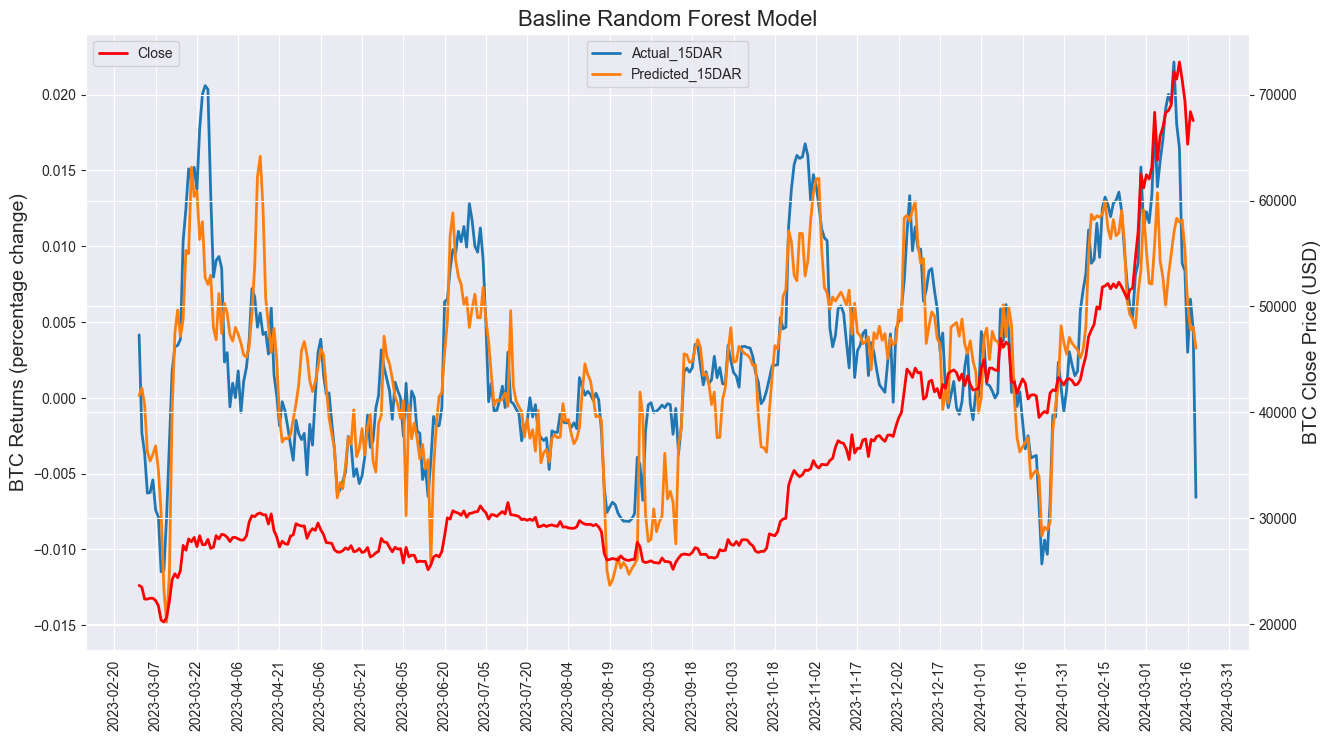

Feature ranking:
1. rsi (0.41813947271928276)
2. stoch_%D (0.3097051877234309)
3. stoch_%K (0.024642795962335665)
4. macd (0.024045171249458507)
5. TWITTER_NEG_SENTIMENT_COUNT (0.011408040661717507)
6. S&P500 Close (0.011245551150459294)
7. S&P500_Close_lag2 (0.011165354475079166)
8. DGS10 (0.009731566246886201)
9. ATR (0.008495418649525585)
10. S&P500_Close_lag1 (0.007227621182602617)
11. macd_signal (0.006913093984922923)
12. TWITTER_SENTIMENT_DAILY_AVG (0.006666153764358791)
13. gg_trend (0.006659091583082776)
14. neutral_avg_score_coinbase (0.006401615231807517)
15. 30D_Moving_STD (0.006330034056205981)
16. positive_avg_score_coinbase (0.005302213609054148)
17. DGS10_lag1 (0.004952500681577154)
18. total_news_score_coinbase (0.004468476275707779)
19. Parkinson_Volatility (0.004343505868137343)
20. NEWS_SENTIMENT_DAILY_AVG (0.004290306041796819)
21. Lower Band (0.003959837520462458)
22. negative_avg_score_bitcoin (0.0039417284714756305)
23. Upper Band (0.003801954513130289)
24. nega

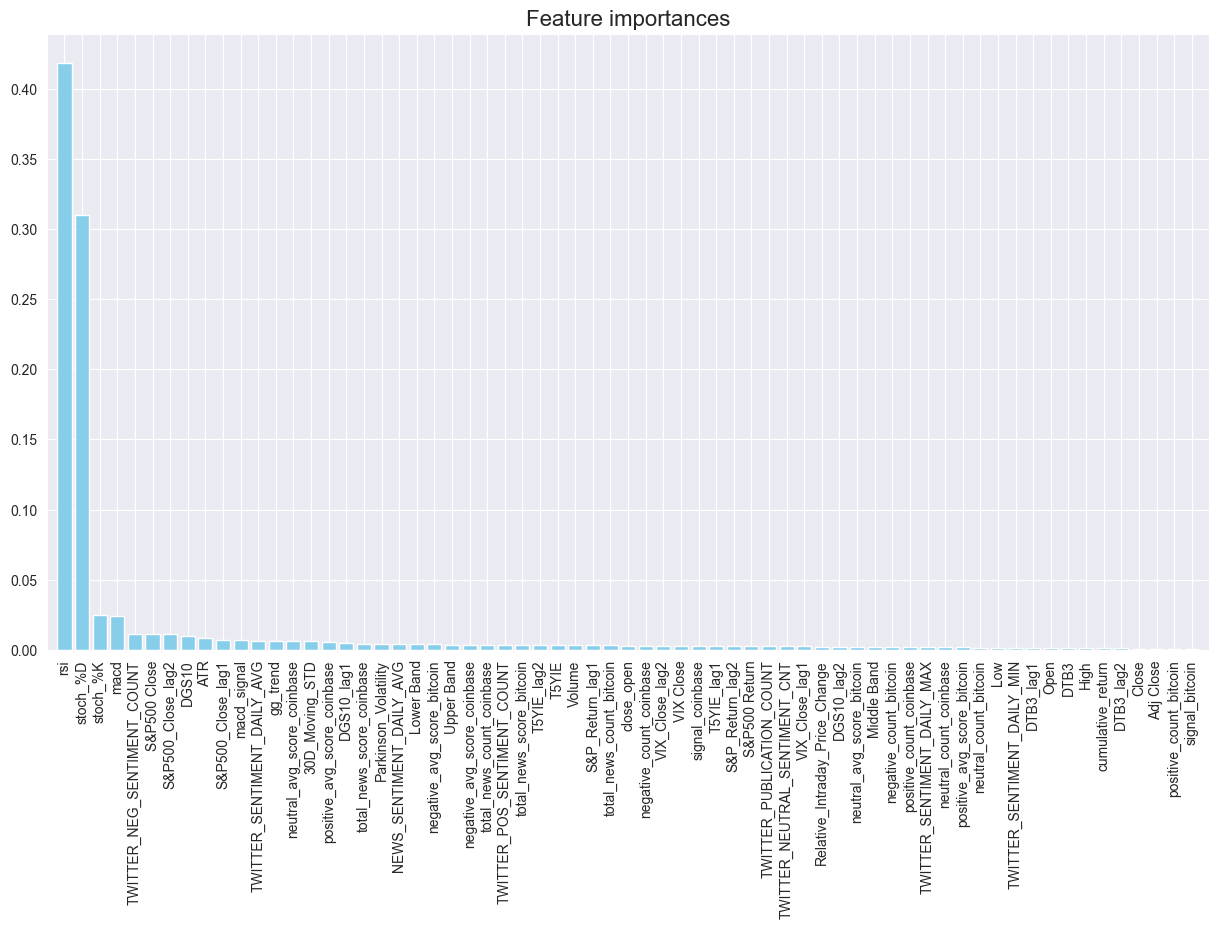

In [13]:
# random forest model
data = data.dropna(subset=["Daily_Return_rolling_15_avg"])

X = data.drop(
    columns=[
        "Daily_Return_rolling_15_avg",
        "Daily Return",
    ]
)
y = data["Daily_Return_rolling_15_avg"]


split_date = "2023-03-01"
X_train = X[X.index < split_date]
X_test = X[X.index >= split_date]
y_train = y[y.index < split_date]
y_test = y[y.index >= split_date]

model, results = train_evaluate_and_plot(
    X_train, y_train, X_test, y_test, daily_close, "Basline Random Forest Model"
)

In [14]:
# calculate metrics
results["actual_direction"] = results["y_test"].apply(lambda x: 1 if x > 0 else 0)
results["Pred_direction"] = results["y_pred"].apply(lambda x: 1 if x > 0 else 0)

tp = results[
    (results["actual_direction"] == 1) & (results["Pred_direction"] == 1)
].shape[0]
fp = results[
    (results["actual_direction"] == 0) & (results["Pred_direction"] == 1)
].shape[0]
fn = results[
    (results["actual_direction"] == 1) & (results["Pred_direction"] == 0)
].shape[0]
tn = results[
    (results["actual_direction"] == 0) & (results["Pred_direction"] == 0)
].shape[0]

print(f"True Positives: {tp}")
print(f"False Positives: {fp}")
print(f"False Negatives: {fn}")
print(f"True Negatives: {tn}")

# calculate precision
precision = tp / (tp + fp)
print(f"Precision: {precision}")

# calculate recall
recall = tp / (tp + fn)
print(f"Recall: {recall}")

# calculate f1 score
f1 = 2 * (precision * recall) / (precision + recall)
print(f"F1 Score: {f1}")

# calculate accuracy
accuracy = (tp + tn) / (tp + tn + fp + fn)
print(f"Accuracy: {accuracy}")

True Positives: 218
False Positives: 27
False Negatives: 22
True Negatives: 118
Precision: 0.889795918367347
Recall: 0.9083333333333333
F1 Score: 0.8989690721649485
Accuracy: 0.8727272727272727


**Rolling sum Features Experiment**

Mean Squared Error: 1.1218303255005258e-05
R Squared: 0.7341209770526202


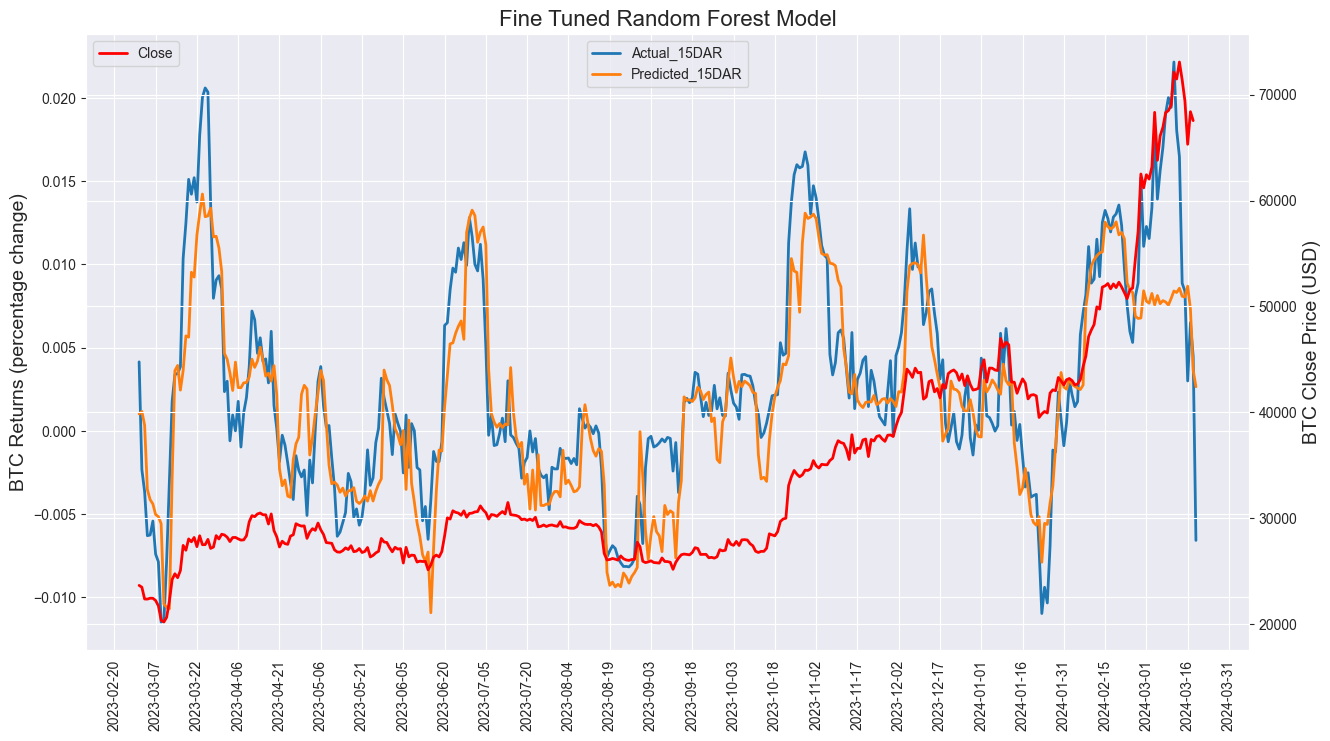

Feature ranking:
1. rsi (0.3149700733013357)
2. stoch_%D (0.24258025682595802)
3. stoch_%K_rolling_10 (0.085799389937552)
4. Relative_Intraday_Price_Change_rolling_10 (0.037890337578376156)
5. negative_count_coinbase_rolling_10 (0.02282774307459544)
6. Relative_Intraday_Price_Change_rolling_20 (0.013276144438428986)
7. close_open_rolling_20 (0.013024305420835004)
8. stoch_%K (0.012868559680422104)
9. stoch_%D_rolling_10 (0.012162300382826306)
10. close_open_rolling_10 (0.011132450412851535)
11. total_news_score_coinbase_rolling_10 (0.007082491628403911)
12. gg_trend_rolling_20 (0.00682453324705281)
13. macd_signal_rolling_20 (0.006416193752151401)
14. gg_trend_rolling_30 (0.005968817769526727)
15. negative_count_bitcoin_rolling_10 (0.004815786098313119)
16. T5YIE_rolling_20 (0.004520565979890098)
17. positive_avg_score_coinbase_rolling_30 (0.0037983111728303286)
18. S&P500 Close (0.0035788632933245476)
19. total_news_score_bitcoin_rolling_30 (0.0033133841936152)
20. neutral_count_bitco

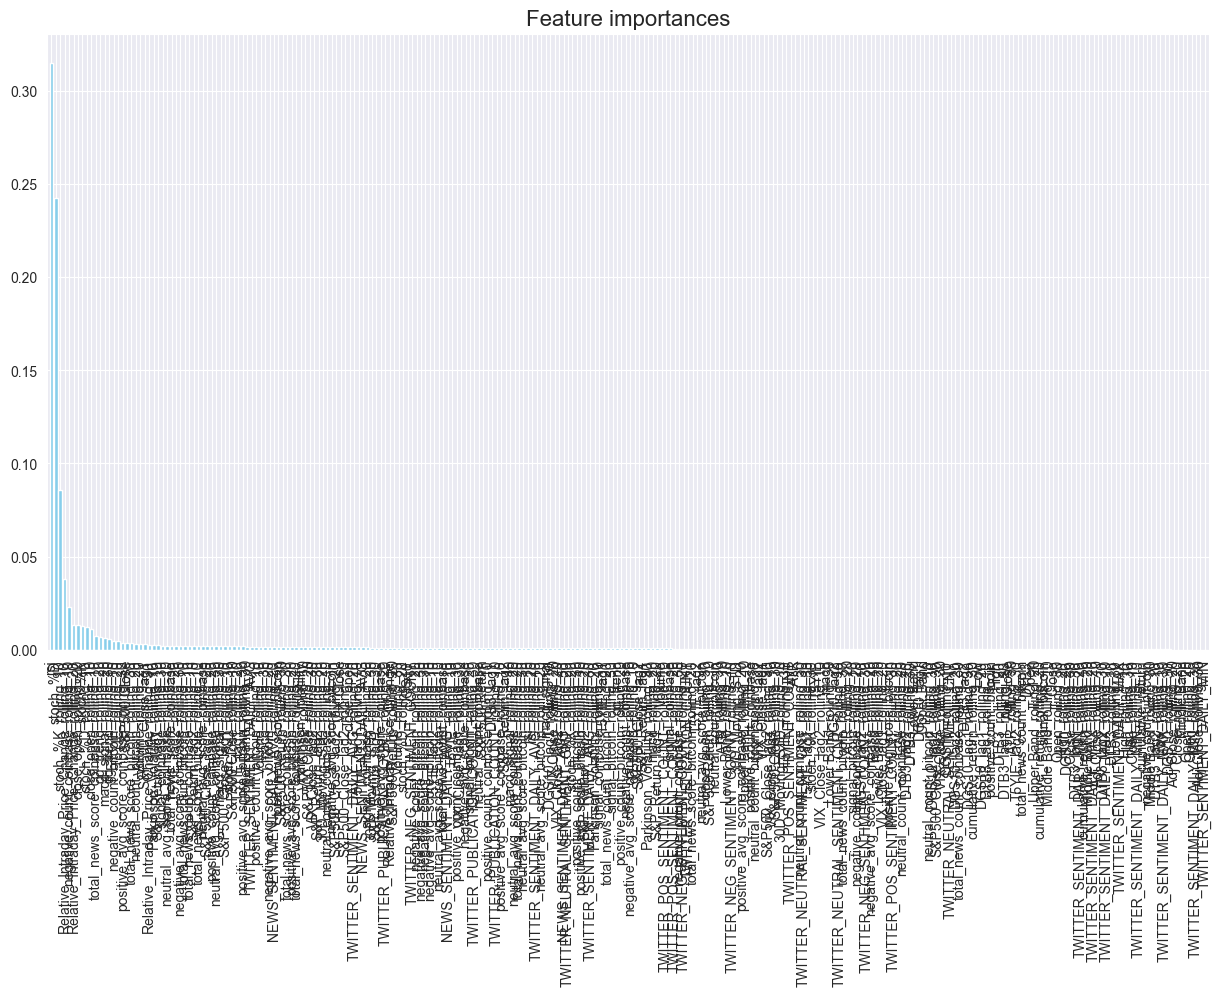

In [15]:
# Define the number of lags
n_lags = 3

# Create a new DataFrame for lagged features
lagged_features = []
lagged_features_cols = []

data = data.dropna(subset=["Daily_Return_rolling_15_avg"])

X_now = data.drop(
    columns=[
        "Daily_Return_rolling_15_avg",
        "Daily Return",
    ]
)
y_now = data["Daily_Return_rolling_15_avg"]

# Create lagged versions of features
for column in X_now.columns:
    for lag in range(1, n_lags + 1):
        lagged_features.append(X_now[column].rolling(lag * 10).sum())
        lagged_features_cols.append(f"{column}_rolling_{lag * 10}")

lagged_features = pd.concat(lagged_features, axis=1)
lagged_features.columns = lagged_features_cols

# Concatenate the original DataFrame with the DataFrame of lagged features
X_now = pd.concat([X_now, lagged_features], axis=1)

# Drop rows with NaN values caused by lagging in both X and y
X_now = X_now.dropna()
y_now = y_now[X_now.index]

# Split the data again after creating lagged features
X_train = X_now[X_now.index < split_date]
X_test = X_now[X_now.index >= split_date]
y_train = y_now[y_now.index < split_date]
y_test = y_now[y_now.index >= split_date]

# Train, evaluate, and plot the model
model, results = train_evaluate_and_plot(
    X_train, y_train, X_test, y_test, daily_close, "Fine Tuned Random Forest Model"
)

**Making another model with best features**

Mean Squared Error: 1.0863324951493552e-05
R Squared: 0.7425341285212348


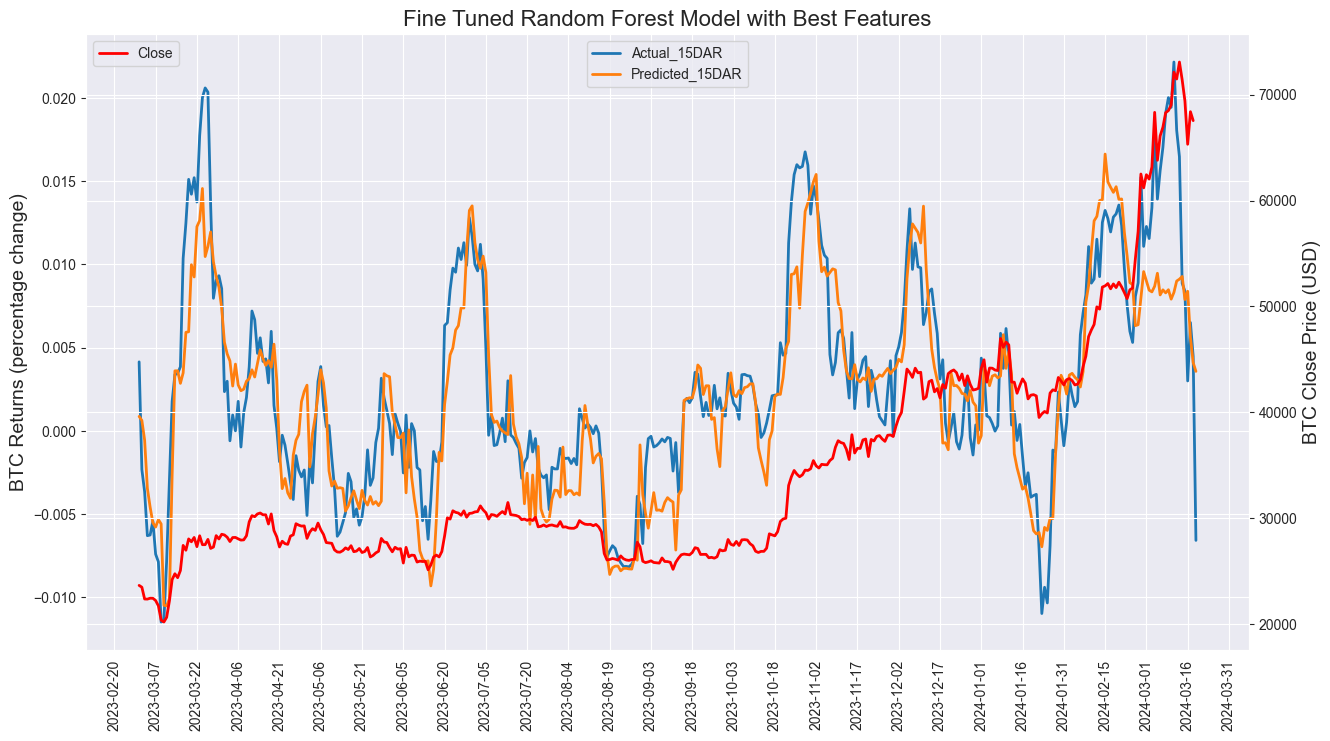

Feature ranking:
1. rsi (0.3462977343960045)
2. stoch_%D (0.2354091387485619)
3. stoch_%K_rolling_10 (0.08480621782110363)
4. Relative_Intraday_Price_Change_rolling_10 (0.04811721413854413)
5. negative_count_coinbase_rolling_10 (0.02553821836245242)
6. stoch_%K (0.019067551429318416)
7. gg_trend_rolling_20 (0.016523004886071377)
8. Relative_Intraday_Price_Change_rolling_20 (0.0162629971661616)
9. stoch_%D_rolling_10 (0.016020734832631164)
10. close_open_rolling_10 (0.014708552570356324)
11. macd_signal_rolling_20 (0.012879958146132553)
12. gg_trend_rolling_30 (0.012473872381523497)
13. negative_count_bitcoin_rolling_10 (0.011744809103044318)
14. total_news_score_coinbase_rolling_10 (0.011669927393212312)
15. total_news_score_bitcoin_rolling_30 (0.011410221013393269)
16. T5YIE_rolling_20 (0.011252986221899288)
17. close_open_rolling_20 (0.009386581582639159)
18. S&P500 Close (0.008872607867258402)
19. S&P500_Close_lag1 (0.00820681867762819)
20. Parkinson_Volatility_rolling_10 (0.0081268

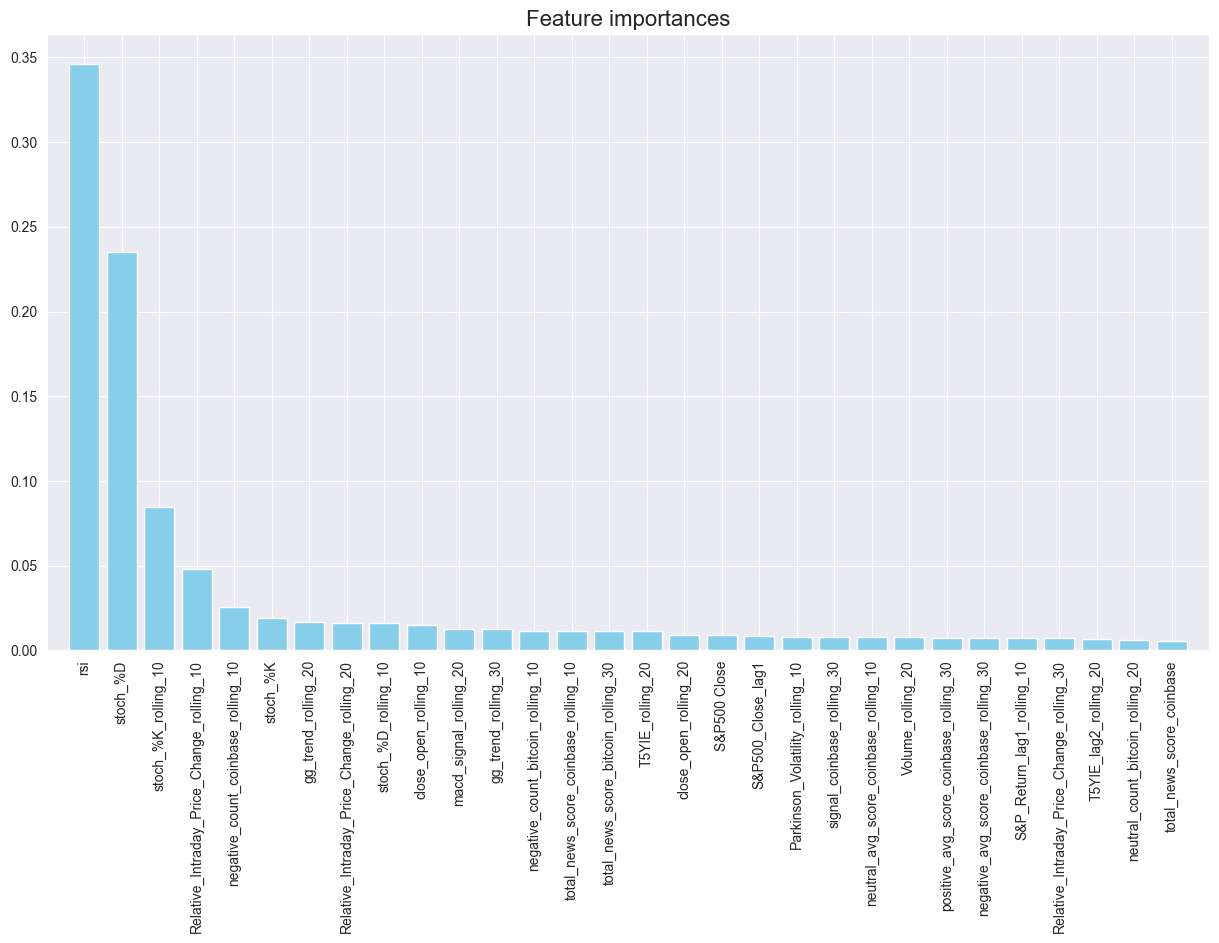

In [16]:
# make another model with best features from the above random forest model
importances = model.feature_importances_
indices = np.argsort(importances)[::-1]
cols = np.array(X_train.columns)[indices][:30]
X = X_now[cols]
y = y_now

split_date = "2023-03-01"
X_train = X[X.index < split_date]
X_test = X[X.index >= split_date]
y_train = y[y.index < split_date]
y_test = y[y.index >= split_date]

model, results = train_evaluate_and_plot(
    X_train,
    y_train,
    X_test,
    y_test,
    daily_close,
    "Fine Tuned Random Forest Model with Best Features",
)

In [17]:
# calculate metrics
results["actual_direction"] = results["y_test"].apply(lambda x: 1 if x > 0 else 0)
results["Pred_direction"] = results["y_pred"].apply(lambda x: 1 if x > 0 else 0)

tp = results[
    (results["actual_direction"] == 1) & (results["Pred_direction"] == 1)
].shape[0]
fp = results[
    (results["actual_direction"] == 0) & (results["Pred_direction"] == 1)
].shape[0]
fn = results[
    (results["actual_direction"] == 1) & (results["Pred_direction"] == 0)
].shape[0]
tn = results[
    (results["actual_direction"] == 0) & (results["Pred_direction"] == 0)
].shape[0]

print(f"True Positives: {tp}")
print(f"False Positives: {fp}")
print(f"False Negatives: {fn}")
print(f"True Negatives: {tn}")

# calculate precision
precision = tp / (tp + fp)
print(f"Precision: {precision}")

# calculate recall
recall = tp / (tp + fn)
print(f"Recall: {recall}")

# calculate f1 score
f1 = 2 * (precision * recall) / (precision + recall)
print(f"F1 Score: {f1}")

# calculate accuracy
accuracy = (tp + tn) / (tp + tn + fp + fn)
print(f"Accuracy: {accuracy}")

True Positives: 215
False Positives: 23
False Negatives: 25
True Negatives: 122
Precision: 0.9033613445378151
Recall: 0.8958333333333334
F1 Score: 0.899581589958159
Accuracy: 0.8753246753246753


**Randomized Grid Search on RF**

In [18]:
# from sklearn.model_selection import RandomizedSearchCV

# # Number of trees in random forest
# n_estimators = [int(x) for x in np.linspace(start=200, stop=20000, num=50)]
# # Number of features to consider at every split
# max_features = ["sqrt", "log2"]
# # Maximum number of levels in tree
# max_depth = [int(x) for x in np.linspace(10, 200, num=11)]
# max_depth.append(None)
# # Minimum number of samples required to split a node
# min_samples_split = [2, 5, 10, 20, 40, 80, 160, 320, 640, 1280]
# # Minimum number of samples required at each leaf node
# min_samples_leaf = [1, 2, 4, 8, 16, 32, 64, 128, 256, 512, 1024]
# # Method of selecting samples for training each tree
# bootstrap = [True, False]

# # Create the random grid
# random_grid = {
#     "n_estimators": n_estimators,
#     "max_features": max_features,
#     "max_depth": max_depth,
#     "min_samples_split": min_samples_split,
#     "min_samples_leaf": min_samples_leaf,
#     "bootstrap": bootstrap,
# }

# # Use the random grid to search for best hyperparameters
# rf = RandomForestRegressor()
# rf_random = RandomizedSearchCV(
#     estimator=rf,
#     param_distributions=random_grid,
#     n_iter=100,
#     cv=2,
#     verbose=2,
#     random_state=21,
#     n_jobs=-1,
# )
# # Fit the random search model
# rf_random.fit(X_train, y_train)

# # Print the best parameters
# print(rf_random.best_params_)

# # Save the best model
# joblib.dump(
#     rf_random.best_estimator_,
#     "../Modeling/models/ideal_RF/model_random_forest_best.pkl",
# )

# # Make predictions
# y_pred = rf_random.best_estimator_.predict(X_test)

# # Evaluate model
# mse = mean_squared_error(y_test, y_pred)
# print(f"Mean Squared Error: {mse}")

# r_squared = rf_random.best_estimator_.score(X_test, y_test)
# print(f"R Squared: {r_squared}")

# # Make a dataframe with y_test and y_pred
# results = pd.DataFrame({"y_test": y_test, "y_pred": y_pred})

# # Compute residuals
# results["residuals"] = results["y_test"] - results["y_pred"]

# # Save results
# results.to_csv("../Modeling/models/ideal_RF/results_random_forest_best.csv")

# # Plot results
# plt.plot(results["y_test"], label="y_test_15_day_avg")
# plt.plot(results["y_pred"], label="y_pred_15_day_avg")
# plt.legend(loc="upper center")
# plt.title("Random Forest Model")

# # Plot the close price on the same graph on the right axis
# plt.twinx()
# plt.plot(daily_close, color="red", label="Close")
# plt.legend(loc="upper left")
# plt.ylabel("BTC Close Price")

# plt.gcf().set_size_inches(15, 8)
# # Set x-axis major ticks to occur every 300 days.
# plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=5))
# plt.xticks(rotation=90)


# plt.show()

**Demo strategy**

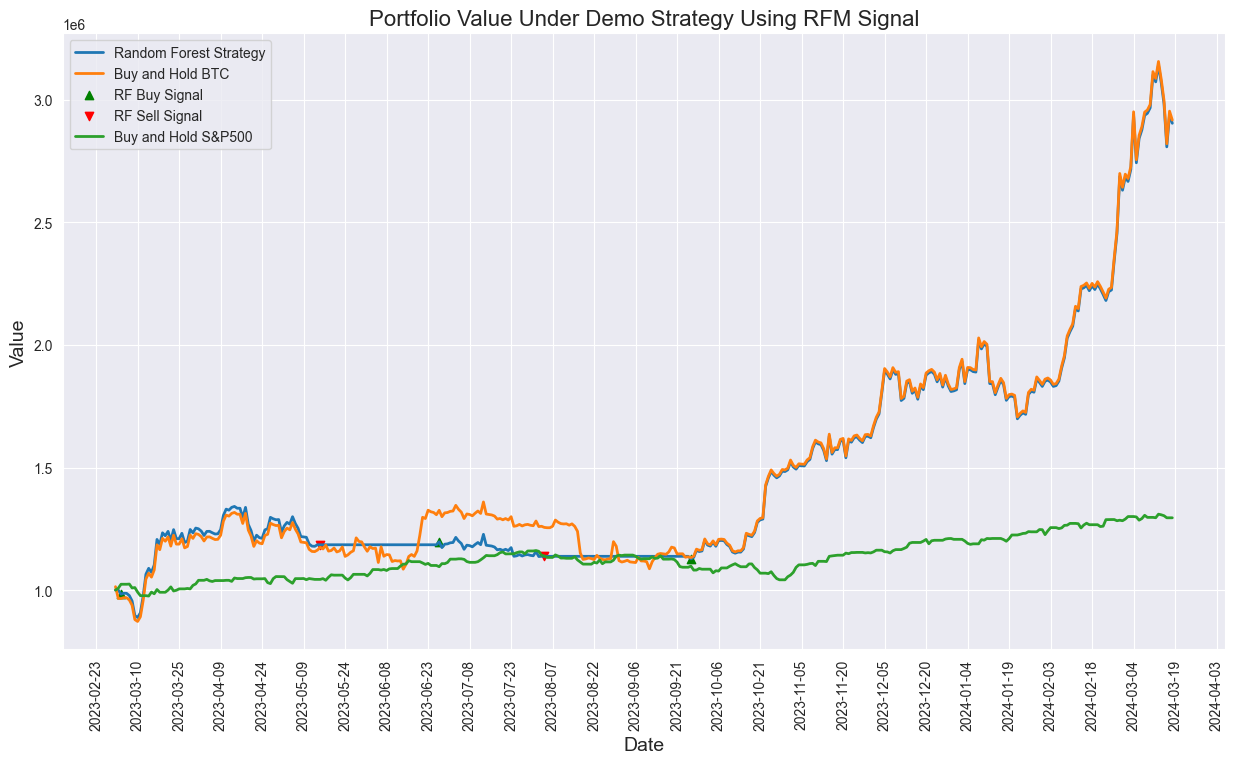

In [19]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns

# use the prdicted moving average to make a trading strategy
results["predicted_direction"] = results["y_pred"].apply(lambda x: 1 if x > 0 else 0)

# if predicted direction is 1 for 15 days in a row, buy
results["buy"] = (results["predicted_direction"].shift(1)) == 1 & (
    results["predicted_direction"].shift(2) == 1
) & (results["predicted_direction"].shift(3) == 1) & (
    results["predicted_direction"].shift(4) == 1
)


# if predicted direction is 0 for three days in a row, sell
results["sell"] = (
    (results["predicted_direction"].shift(1) == 0)
    & (results["predicted_direction"].shift(2) == 0)
    & (results["predicted_direction"].shift(3) == 0)
    & (results["predicted_direction"].shift(4) == 0)
)

results["closing_price"] = daily_close
results["open_price"] = daily_open

# if declinining in the last 5 days, sell
results["sell_2"] = results["sell"] | (
    (results["closing_price"].shift(1) < results["closing_price"].shift(2))
    & (results["closing_price"].shift(2) < results["closing_price"].shift(3))
    & (results["closing_price"].shift(3) < results["closing_price"].shift(4))
    & (results["closing_price"].shift(4) < results["closing_price"].shift(5))
    & (results["closing_price"].shift(5) < results["closing_price"].shift(6))
    & (results["closing_price"].shift(6) < results["closing_price"].shift(7))
    & (results["closing_price"].shift(7) < results["closing_price"].shift(8))
    & (results["closing_price"].shift(8) < results["closing_price"].shift(9))
    & (results["closing_price"].shift(9) < results["closing_price"].shift(10))
)

results["buy_previous"] = results["buy"].shift(1)
results["change_buy"] = False
results["change_sell"] = False


class strategy:
    """A class to represent a DEMO trading strategy"""

    def __init__(self, cash):
        self.starting_cash = cash
        self.cash = cash
        self.bitcoins = 0
        self.sell_counter = 0
        self.buy_counter = 0

    def buy(self, row):
        """Buy bitcoin if we have cash and we are not in a buy counter period"""
        if self.sell_counter > 0:
            self.sell_counter -= 1

        elif self.cash > row["open_price"] and self.sell_counter == 0:
            # buy bitcoin with all cash
            self.bitcoins += self.cash // row["open_price"]
            # print(self.bitcoins)
            self.cash = 0
            self.buy_counter += 15
            results.loc[row.name, "change_buy"] = True

    def sell(self, row):
        """Sell bitcoin if we have bitcoins and we are not in a sell counter period"""
        if self.buy_counter > 0:
            self.buy_counter -= 1

        elif self.bitcoins > 0 and self.buy_counter == 0:
            # sell half of bitcoins
            self.cash += self.bitcoins * row["open_price"]
            self.bitcoins = 0
            # print(self.bitcoins)
            self.sell_counter += 10
            results.loc[row.name, "change_sell"] = True

    def get_cash(self):
        """Return the amount of cash in the portfolio"""
        return self.cash

    def get_bitcoins(self):
        """Return the number of bitcoins in the portfolio"""
        return self.bitcoins

    def get_value(self, row):
        """Return the value of the portfolio at the end of the day"""
        return self.cash + self.bitcoins * row["closing_price"]

    def get_profit(self, row):
        """Return the profit of the portfolio at the end of the day"""
        return self.get_value(row) - self.starting_cash

    def get_profit_percent(self, row):
        """Return the profit percent of the portfolio at the end of the day"""
        return self.get_profit(row) / self.starting_cash


strat = strategy(1000000)


def apply_strategy(strat, row):
    """Apply the strategy to the row and return the portfolio value"""
    if row["buy"]:
        if not row["buy_previous"]:
            strat.buy(row)
        elif row["sell_2"]:
            strat.sell(row)
        else:
            strat.buy(row)
    elif row["sell"] or row["sell_2"]:
        strat.sell(row)

    return strat.get_value(row)


results["portfolio_value"] = results.apply(lambda x: apply_strategy(strat, x), axis=1)

# portfolio value if we just bought all  1 million worth of bitcoin on the first day
bitcoins_on_day_1 = 1000000 / results["open_price"].iloc[0]
results["buy_and_hold"] = results["closing_price"] * bitcoins_on_day_1
results = results.dropna()

# Set the style of seaborn
sns.set_style("darkgrid")

# Create a figure and a set of subplots
fig, ax = plt.subplots(figsize=(15, 8))

# Plot the portfolio value
ax.plot(results["portfolio_value"], label="Random Forest Strategy", linewidth=2)

# Plot the buy and hold value
ax.plot(results["buy_and_hold"], label="Buy and Hold BTC", linewidth=2)

# Plot buy sell signals
ax.scatter(
    results[results["change_buy"]].index,
    results[results["change_buy"]]["portfolio_value"],
    marker="^",
    color="g",
    label="RF Buy Signal",
)
ax.scatter(
    results[results["change_sell"]].index,
    results[results["change_sell"]]["portfolio_value"],
    marker="v",
    color="r",
    label="RF Sell Signal",
)

# Add S&P500 buy and hold to the plot
results["snp500"] = data[data.index >= split_date]["S&P500 Close"]
snp500_on_day_1 = 1000000 / results["snp500"].iloc[0]
results["buy_and_hold_snp500"] = results["snp500"] * snp500_on_day_1
ax.plot(results["buy_and_hold_snp500"], label="Buy and Hold S&P500", linewidth=2)

# Set the title and labels
ax.set_title("Portfolio Value Under Demo Strategy Using RFM Signal", fontsize=16)
ax.set_ylabel("Value", fontsize=14)
ax.set_xlabel("Date", fontsize=14)

# Set x-axis major ticks to occur every 15 days.
ax.xaxis.set_major_locator(mdates.DayLocator(interval=15))
plt.xticks(rotation=90)
ax.legend()
plt.show()

In [20]:
# RFM strategy metrics
# calculate sharpe ratio
daily_returns = results["portfolio_value"].pct_change()
sharpe_ratio = daily_returns.mean() / daily_returns.std()
print(f"Strategy Sharpe Ratio: {sharpe_ratio * np.sqrt(252)}")

# calculate max drawdown
cumulative_returns = results["portfolio_value"].pct_change().cumsum()
max_drawdown = cumulative_returns - cumulative_returns.cummax()
max_drawdown = max_drawdown.min()
print(f"Strategy Max Drawdown: {max_drawdown}")

# calculare profit
profit = strat.get_profit(results.iloc[-1])
print(f"Strategy Profit: {profit} \n")

# BTC buy and hold metrics
# calculate shgarp ratio for buy and hold
daily_returns = results["buy_and_hold"].pct_change()
sharpe_ratio = daily_returns.mean() / daily_returns.std()
print(f"Sharpe Ratio Buy and Hold: {sharpe_ratio * np.sqrt(252)}")

# calculate max drawdown for buy and hold
cumulative_returns = results["buy_and_hold"].pct_change().cumsum()
max_drawdown = cumulative_returns - cumulative_returns.cummax()
max_drawdown = max_drawdown.min()
print(f"Max Drawdown Buy and Hold: {max_drawdown}")

# calculate profit for buy and hold
profit = results["buy_and_hold"].iloc[-1] - 1000000
print(f"Profit Buy and Hold: {profit}")

Strategy Sharpe Ratio: 2.211422050779824
Strategy Max Drawdown: -0.16726754805971422
Strategy Profit: 1904589.53125 

Sharpe Ratio Buy and Hold: 2.0125125837985047
Max Drawdown Buy and Hold: -0.2148138608168947
Profit Buy and Hold: 1917748.6460283217


In [21]:
# SNP500 buy and hold metrics
# calculate sharpe ratio of SnP500 for the same period
snp500 = data["S&P500_Close_lag1"]
snp500 = snp500[snp500.index >= split_date]
daily_returns = snp500.pct_change()
sharpe_ratio = daily_returns.mean() / daily_returns.std()
print(f"Sharpe Ratio S&P500: {sharpe_ratio * np.sqrt(252)}")

# calculate max drawdown for SnP500
cumulative_returns = snp500.pct_change().cumsum()
max_drawdown = cumulative_returns - cumulative_returns.cummax()
max_drawdown = max_drawdown.min()
print(f"Max Drawdown S&P500: {max_drawdown}")

# calculate profit for SnP500
profit = results["buy_and_hold_snp500"].iloc[-1] - 1000000
profit_percent = profit / 1000000
print(f"Profit S&P500: {profit} \n")
print(f"Profit Percent S&P500: {profit_percent}")

Sharpe Ratio S&P500: 1.669666642352345
Max Drawdown S&P500: -0.10650621817099193
Profit S&P500: 295010.10602912237 

Profit Percent S&P500: 0.29501010602912237


In [22]:
# save the final model
joblib.dump(model, "../Modeling/models/RF_model_final_fine_tuned.pkl")

['../Modeling/models/RF_model_final_fine_tuned.pkl']

In [23]:
results["daily_price_change_in_dollars"] = results["closing_price"].diff()
# magnitude bins less than -1320, -1320, -989, -990, -659, -660, -329, 3320, -1, 0, 330, 330, 660, 660 ,990 ,990 ,1320 and up
bins = [-np.inf, -1320, -989, -659, -329, -1, 330, 660, 990, 1320, np.inf]
labels = [
    1,
    2,
    3,
    4,
    5,
    6,
    7,
    8,
    9,
    10,
]

results["magnitude_bins"] = pd.cut(
    results["daily_price_change_in_dollars"], bins=bins, labels=labels
)
results[["magnitude_bins", "daily_price_change_in_dollars"]]
results["predicted_price_change_in_dollars"] = results["y_pred"] * results[
    "open_price"
].shift(1)
results["predicted_magnitude_bins"] = pd.cut(
    results["predicted_price_change_in_dollars"], bins=bins, labels=labels
)
results[
    [
        "predicted_magnitude_bins",
        "magnitude_bins",
    ]
]

results = results.dropna()

# calculate F1 score of this multi class classification
from sklearn.metrics import f1_score

f1 = f1_score(
    results["magnitude_bins"],
    results["predicted_magnitude_bins"],
    average="weighted",
)

print(f"F1 Score: {f1}")

# calculate accuracy
accuracy = (
    results["magnitude_bins"] == results["predicted_magnitude_bins"]
).sum() / len(results)

print(f"Accuracy: {accuracy}")

F1 Score: 0.16358493512941738
Accuracy: 0.21465968586387435


In [24]:
results[
    [
        "magnitude_bins",
        "daily_price_change_in_dollars",
        "predicted_magnitude_bins",
        "predicted_price_change_in_dollars",
    ]
]

,magnitude_bins,daily_price_change_in_dollars,predicted_magnitude_bins,predicted_price_change_in_dollars
date_dt,,,,
2023-03-03,2,-1112.787109,5,-13.088897
2023-03-04,5,-9.330078,5,-80.989889
2023-03-05,6,82.164062,5,-102.321192
2023-03-06,5,-5.755859,5,-123.405931
2023-03-07,5,-209.988281,5,-129.596322
...,...,...,...,...
2024-03-14,1,-1686.906250,8,662.933139
2024-03-15,1,-1992.820312,7,576.670737
2024-03-16,1,-4088.656250,7,598.660991


> Dustribution of predicted magnitudes

<Axes: xlabel='magnitude_bins'>

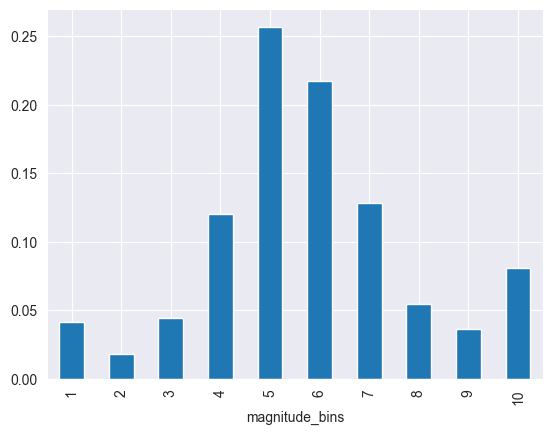

In [25]:
# plot distribution of magnitude bins in terms of proportion
results["magnitude_bins"].value_counts(normalize=True).sort_index().plot(kind="bar")